In [1]:
import pandas as pd

In [2]:
wnba = pd.read_csv("wnba.csv")

In [3]:
wnba["Age"].describe().iloc[3:]

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64

In [4]:
a=(wnba["Age"].value_counts(normalize = True)*100).sort_index()

In [5]:
b=a.iloc[:11].sum()
b

85.31468531468533

In [6]:
a[11:].sum()

14.685314685314685

In [7]:
wnba["Weight"].value_counts(bins = 10)

(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(60.8, 66.6]      21
(89.8, 95.6]      10
(66.6, 72.4]      10
(54.941, 60.8]     5
(107.2, 113.0]     3
(95.6, 101.4]      3
(101.4, 107.2]     2
Name: Weight, dtype: int64

In [8]:
wnba["PTS"].min()
wnba["PTS"].max()

584

In [9]:
wnba["PTS"].value_counts(bins = 10)

(1.417, 60.2]     30
(60.2, 118.4]     24
(176.6, 234.8]    20
(234.8, 293.0]    17
(118.4, 176.6]    17
(351.2, 409.4]    10
(409.4, 467.6]     8
(293.0, 351.2]     8
(525.8, 584.0]     5
(467.6, 525.8]     4
Name: PTS, dtype: int64

In [10]:
intervals = pd.interval_range(0,600,freq = 100)
intervals

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')

In [11]:
import numpy as np

In [12]:
pts_freq = pd.Series(np.zeros(6),index = intervals)

In [13]:
pts_freq

(0, 100]      0.0
(100, 200]    0.0
(200, 300]    0.0
(300, 400]    0.0
(400, 500]    0.0
(500, 600]    0.0
dtype: float64

In [14]:
for i in wnba["PTS"]:
    for interval in intervals:
        #print(interval)
        if i in interval:
            pts_freq.loc[interval] += 1 
            break

In [15]:
pts_freq.sum()

143.0

In [19]:
wnba["Experience"].value_counts(dropna = False)

R     23
3     19
6     14
5     14
1     12
9     11
4     11
2     11
10     5
7      4
12     4
11     4
8      3
14     3
13     3
15     2
Name: Experience, dtype: int64

In [24]:
def category(x):
    if pd.isnull(x):
        return "Rookie"
    elif 1<= x <=5:
            return "Less Experience"
    elif 5< x <=10:
            return "Experienced"
    elif x>10 :
        return "Very Experienced"
        

In [26]:
exp =pd.to_numeric(wnba["Experience"], errors= "coerce")

In [32]:
wnba["exp_ordinal"] = exp.apply(category)


In [42]:
import matplotlib.pyplot as plt

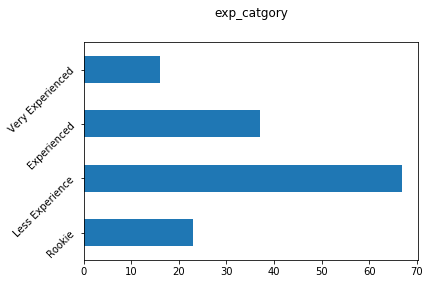

In [44]:
wnba["exp_ordinal"].value_counts().iloc[[2,0,1,3]].plot.barh(rot = 45)
plt.title("exp_catgory", y = 1.09)
plt.show()

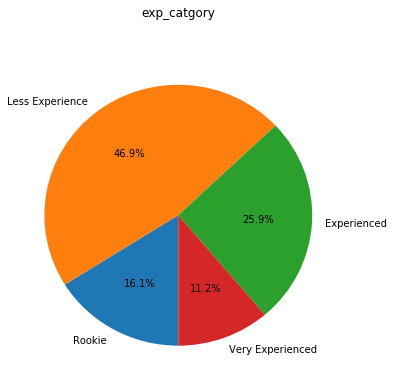

In [52]:

fig, ax = plt.subplots(figsize = (6,6))
(wnba["exp_ordinal"].value_counts(normalize = True)*100).iloc[[2,0,1,3]].plot.pie(autopct = "%.1f%%",startangle = -90,counterclock = False)
plt.title("exp_catgory", y = 1.09)
plt.show()

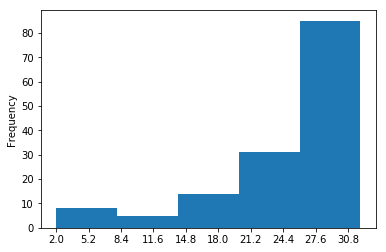

In [57]:
wnba["Games Played"].plot.hist(xticks = np.arange(2,32,3.2),bins=5)

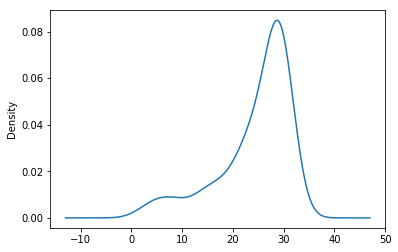

In [58]:
wnba["Games Played"].plot.kde()

In [61]:
wnba[wnba["exp_ordinal"]=="Rookie"]["Pos"].value_counts()

G      14
F       4
C       4
F/C     1
Name: Pos, dtype: int64

In [62]:
wnba[wnba["exp_ordinal"]=="Very Experienced"]["Pos"].value_counts()

G      7
F      4
G/F    3
F/C    1
C      1
Name: Pos, dtype: int64

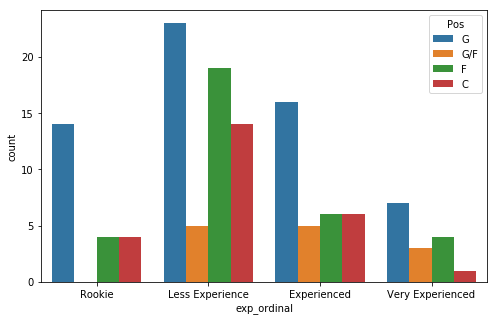

In [67]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.countplot(x="exp_ordinal", hue = "Pos", data = wnba,
              order = ["Rookie","Less Experience","Experienced","Very Experienced"],
              hue_order = ["G","G/F","F","C"])

In [68]:
wnba["Age"].mean()

27.076923076923077

In [69]:
wnba["MIN"].mean()

496.97202797202794

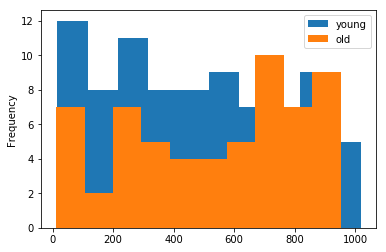

In [76]:
wnba[wnba["Age"]<=27]["MIN"].plot.hist(label = "young")
wnba[wnba["Age"]>27]["MIN"].plot.hist(label = "old")
plt.legend()

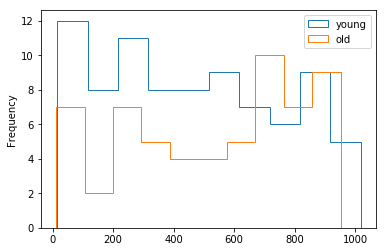

In [78]:
wnba[wnba["Age"]<=27]["MIN"].plot.hist(label = "young",histtype = "step")
wnba[wnba["Age"]>27]["MIN"].plot.hist(label = "old",histtype = "step")
plt.legend()

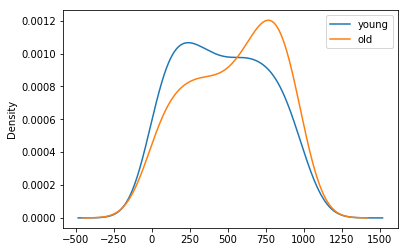

In [80]:
wnba[wnba["Age"]<=27]["MIN"].plot.kde(label = "young")
wnba[wnba["Age"]>27]["MIN"].plot.kde(label = "old")
plt.legend()

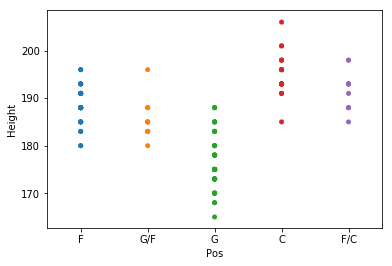

In [85]:
sns.stripplot(x = "Pos", y = "Height", data = wnba, jitter = False)

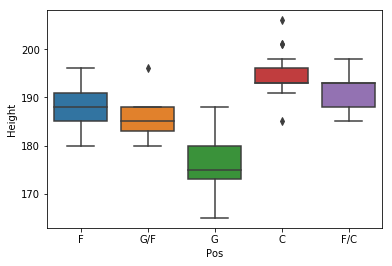

In [86]:
sns.boxplot(x = "Pos", y = "Height", data = wnba)

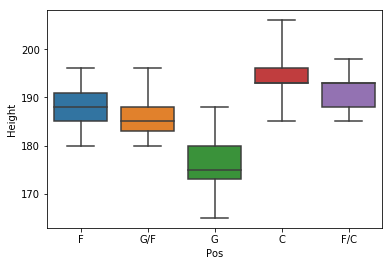

In [89]:
sns.boxplot(x = "Pos", y = "Height", data = wnba, whis = 4)

In [87]:
wnba[wnba["Pos"]=="c"]["Height"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Height, dtype: float64